In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config_file ='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model ='frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [4]:
classLabels = []
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classLabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean([127.5,127.5,127.5])
model.setInputSwapRB(True)

< cv2.dnn.Model 000002297B9BD8D0>

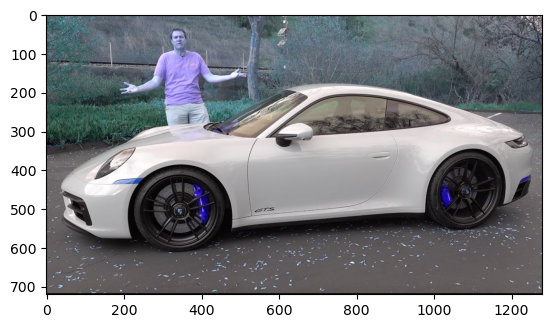

In [8]:
img = cv2.imread('try.jpg')
plt.imshow(img)

In [9]:
ClassIndex, confidence, bbox=model.detect(img, confThreshold=0.5)

In [10]:
print(ClassIndex)

[1 3]


In [11]:
font_scale =3
font =cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness=3)

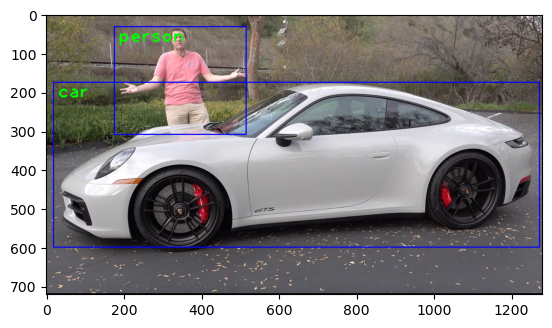

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

For video

In [13]:
cap = cv2.VideoCapture('sample.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IDError("Can't open the video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassIndex<=80).any():
                cv2.rectangle(frame, boxes,(255, 0, 0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale= font_scale, color= (0, 255, 0), thickness =3)
                            
    cv2.imshow('Obj detection', frame)
                            
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
        
        
cap.release()
cv2.destroyallWindows()

[1 3 3 1 1 1 1 1 1 3 3 1]
[1 3 3 1 1 1 1 1 1 3 3 1]
[3 1 3 1 1 1 1 1 1 3 3 3]
[3 1 3 1 1 1 1 1 1 3 3 3]
[3 1 3 1 1 1 1 1 1 3 3 3]
[1 3 3 1 1 1 1 1 1 3 3]
[1 3 3 1 1 1 1 1 1 3 3 3]
[3 1 3 1 1 1 1 1 3 1 3 3]
[3 1 3 1 1 1 1 3 3 3 3 1]
[3 1 3 1 1 1 3 1 3 3 3]
[3 3 1 1 3 1 1 1 3 3 3]
[3 3 1 3 1 1 1 1 3 3 3]
[3 3 1 3 1 1 1 3 1 3 3 1]
[3 3 1 3 1 1 1 3 1 3 1 3]
[3 1 3 3 1 1 3 1 1 3 3 1]
[3 1 3 3 1 1 3 1 1 3 3]
[3 1 3 3 3 1 1 1 1 3 3 2]
[3 1 3 3 1 2 1 1 3 1 3 3 1]
[3 1 3 1 3 1 3 1 1 3 3]
[3 1 1 3 3 3 1 1 1 3]
[3 1 3 3 3 1 1 1 3 1 1]
[3 1 3 3 1 3 1 1 3 1]
[3 1 3 1 3 3 1 1 3 1]
[3 1 3 3 1 3 1 1 3 1]
[3 1 3 1 3 3 1 3 1 1 3]
[3 1 3 1 3 1 3 1 3 1 3]
[3 1 3 3 1 3 3 1 1 1]
[3 1 1 3 3 3 1 3 1 1]
[3 1 1 3 1 3 1 1 3 1 3]
[3 1 1 3 1 3 1 1 3 3 1]
[3 1 1 3 1 1 1 3 1 1]
[3 1 1 3 1 1 1 2 3 1 1]
[3 1 1 3 1 1 1 3 3 1 1 1]
[3 1 1 1 3 1 1 3 1 1]
[3 1 1 1 1 3 3 1 3 1 1]
[3 1 1 1 1 3 1 1 3 3 1]
[3 1 1 1 3 1 1 1 3 1 3]
[3 1 1 1 3 3 1 1 1 3 1]
[3 1 1 3 1 3 1 3 1 1 3]
[3 1 1 3 3 1 1 3 1 1 3]
[3 1 1 1 3 3 1 3 1 1]
[3 1

[3 1 1 1 3 3 3 1 3 1 1 1 1]
[3 1 1 3 3 1 3 1 3 1 1 1 1]
[3 1 1 3 1 3 3 3 1 1 1 1 1 1]
[1 1 3 3 1 3 3 3 1 1 1 1 1 1]
[3 1 1 1 3 3 3 1 3 1 1 1 1 1]
[3 1 1 1 1 3 3 3 3 1 1 1 1 1]
[1 3 1 1 3 1 3 3 3 1 1 1 1 1]
[3 1 1 3 1 1 3 3 3 1 1 1 1 1 3]
[1 3 1 1 3 3 3 1 1 3 1 1 1 1 3]
[1 1 3 3 1 3 3 1 3 1 1 1 3 1]
[1 1 3 1 3 1 3 3 3 3 1 1 1 1]
[1 1 3 1 3 1 3 3 3 3 1 1 1]
[1 1 3 1 3 3 1 3 3 3 1 1 1]
[1 3 1 1 3 3 1 3 3 3 1 1 1]
[1 3 3 1 1 3 1 3 3 3 1 1 1]
[1 3 1 3 1 3 1 3 3 3 1 1 1]
[1 3 3 1 3 3 1 3 1 3 1 1 1]
[1 3 3 1 3 3 1 1 3 3 1 1 1]
[1 3 3 3 1 3 1 1 3 3 1 1]
[1 3 3 3 1 3 1 1 3 1 1 1 3]
[1 3 3 3 1 3 1 1 3 1 1 1]
[1 3 3 3 1 3 1 1 3 1 1 1 3]
[1 3 3 1 3 3 1 3 1 1 1 1 3]
[1 3 3 1 3 3 1 1 3 1 3 1 1]
[1 3 3 3 1 3 1 1 3 1 1]
[1 3 3 1 3 3 1 1 1 3 3 1]
[1 3 3 1 3 3 1 1 1 3 3 1]
[1 3 1 3 3 3 1 3 1 1 3 1 1]
[1 3 1 3 3 1 3 1 3 1 1 1 3 1]
[1 1 3 3 1 3 3 1 1 3 1 1 3 1]
[1 3 1 3 3 1 3 1 1 3 1 1 3 1]
[1 3 1 3 3 1 3 1 3 1 1 1 3]
[1 3 1 3 3 1 1 3 1 1 1 1 3]
[1 1 3 1 3 3 1 3 1 1 1 1 3]
[1 1 3 1 3 1 3 3 1 1 1 1 3]
[1 1

[1 1 1 1 1 6 1 3]
[1 1 1 1 6 1 1 1]
[1 1 1 6 1 1 1]
[1 1 1 6 1 1]
[1 1 1 1 6 1]
[1 1 1 1 1 6 1 1]
[1 1 1 1 1 6 1]
[1 1 1 1 1 6 1 1]
[1 1 1 1 1 1 1 6]
[1 1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1]
[1 1 1 1 1 1 1 3 1]
[1 1 1 1 1 1 3 1]
[1 1 1 1 1 1 3 1]
[1 1 1 1 1 1 3 1]
[1 1 1 1 1 1 1 3 6]
[1 1 1 1 1 1 6 3 1]
[1 1 1 1 1 1 6 3 1]
[1 6 1 1 1 1 3 1 1]
[1 1 1 6 1 1 3 1 1 3]
[1 6 1 1 1 1 3 1 3 1]
[6 1 1 1 1 1 1 3 1]
[6 1 1 1 1 1 1 3 1 3]
[6 1 1 1 1 1 1 1 3 1]
[6 1 1 1 1 1 1 1 3 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 3]
[6 1 1 1 1 1 1 3 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1 3]
[6 1 1 1 1 1 1 1 1 3 3 1]
[6 1 1 1 1 1 1 3 3 1 1]
[6 1 1 1 1 1 3 1 3 1 1 3]
[6 1 1 1 1 1 3 1 3 3]
[6 1 1 1 1 1 3 1 3 3]
[6 1 1 1 1 1 1 3 3 3 1 1]
[6 1 1 1 1 1 3 1 3 3 1 1 1]
[6 1 1 1 1 1 3 3 3 1 3 1]
[6 1 1 1 1 1 3 3 1 1 1 1 3 1]
[6 1 1 1 1 1 3 1 3 1 1 3 3 1 1]
[6 1 1 1 1 3 1 1 1 1 3 3 3 1]
[6 1 1 1 3 1 1 1 1 1 3 1 3]
[6 1

[1 3 1 1 1 1 1 1 1 3]
[1 3 1 1 1 1 1 1 1 3 2 3]
[1 3 1 1 1 1 1 1 2 1 3 3]
[1 3 1 2 1 1 1 1 1 1 3 3]
[1 3 1 1 1 1 1 1 1 3]
[1 3 1 1 1 1 1 1 1 2 3]
[1 3 1 1 1 1 1 1 1 2 3 3]
[1 3 1 1 1 1 1 1 1 3]
[1 3 1 1 1 1 1 1 1 3]
[1 3 1 1 1 1 1 1 1]
[1 3 1 1 1 1 1 1 1]
[1 1 3 1 1 1 1 1 1]
[1 1 3 1 1 1 1 1 1]
[1 3 1 1 1 1 1 1 1]
[1 3 1 1 1 1 1 1 1 3]
[1 3 1 1 1 1 1 1 1 3 3]
[1 3 1 1 1 1 1 1 1 3]
[1 3 1 1 1 1 1 3 1 3 1]
[1 3 1 1 1 1 1 3 1 3]
[1 3 1 1 1 1 1 3 3]
[1 3 1 1 1 1 1 3 3 1 3]
[1 1 3 1 1 1 1 3 3]
[1 1 3 1 1 1 1 3 3]
[1 1 3 1 1 1 1 3 1 3]
[1 1 3 1 1 1 1 3 3 1]
[1 3 1 1 1 1 1 3 1 3]
[1 3 1 1 1 1 3 1 3]
[1 3 1 1 1 3 1 1 3]
[1 3 1 1 3 1 1 1 3]
[1 3 1 1 1 3 1 1 3 3]
[1 3 1 1 1 3 3 1 1 3 1]
[1 3 1 1 1 3 3 1 1 3 1]
[1 3 1 1 1 3 1 3 1 1 1 3]
[1 3 1 1 1 1 3 3 1 1 3]
[1 3 1 1 3 1 1 3 1 1 3 1]
[1 3 1 3 1 1 3 1 1 1 3 1]
[1 3 3 1 1 1 3 1 1 1 3]
[1 3 1 1 1 3 3 1 1 1 3]
[1 3 3 3 1 1 1 1 1 1 3]
[1 3 3 3 1 1 1 1 1 3 1]
[1 3 3 1 3 1 1 1 1 3]
[1 3 1 3 3 1 1 1 1 3]
[1 3 1 3 1 3 1 1 1 3]
[3 1 1 3 3 1 1 1 1 3]
[3 3

[ 1  3 28  1  1  1  1  1  1  3]
[ 1  3  1  1 28  1  1  1  1  3]
[ 1  1  3  1  1 28  1  2  1  1  3]
[1 1 3 1 2 1 1 3 1 1 1]
[1 1 3 2 1 1 1 1 3 1]
[1 1 3 1 2 1 1 3 1 1 1]
[1 1 1 3 1 1 2 3 1 1 3 1 2 1]
[1 1 1 1 1 2 1 3 3 1 3 1 1 2]
[1 1 1 1 1 1 2 3 1 3 1 1 2 3]
[ 1  1  1  3  1  2  1  1  3  1  1  1 28  3  1]
[1 1 3 1 3 1 1 1 2 1 1 3 1]
[3 1 1 2 1 3 1 1 1 1 3]
[3 1 1 1 1 3 1 1 1 2 3 1]
[3 1 1 1 3 1 1 2 1 1 1 3]
[3 1 1 3 1 1 1 1 1 2 1 3]
[3 1 3 1 1 1 1 1 1 2 1 3 1]
[3 3 1 1 1 1 1 3 2 1]
[3 3 1 1 1 1 1 1 3]
[3 3 1 1 1 1 3 1 1 1 1]
[3 1 3 1 1 1 1 3 1]
[3 1 3 1 1 1 1 1 3 1]
[3 1 3 1 1 1 1 3 1 1]
[3 3 1 1 1 1 1 1 1 1]
[3 1 3 1 1 1 1 1 1 1]
[3 3 1 1 1 1 1 1 1 1]
[3 3 1 1 1 1 1 1]
[3 3 1 1 1 1 1 1 1 3 1 1]
[3 3 1 1 1 1 1 1 1 1]
[3 3 1 1 1 1 1 1 1 1]
[3 3 1 1 1 1 1 3]
[3 3 1 1 1 3 1]
[3 3 1 1 1 1 1 3]
[3 3 1 1 1 1 3 1 1]
[3 1 3 1 1 1 1 1 1 3 1]
[3 1 3 1 1 1 1 1 1 1 3 1]
[3 1 3 1 1 1 1 1 3 1 1]
[3 1 3 1 1 1 1 3 1 1]
[3 1 3 1 1 1 1 1 3 1]
[3 3 1 1 1 1 1 1 3 1]
[3 1 3 1 1 1 3 1 1 1]
[3 1 3 1 1 1 1 1 3

[3 1 3 3 1 1 1 1 3 1]
[3 1 3 3 1 1 1 1 3]
[3 3 3 1 1 1 1 1 3]
[3 3 3 1 1 1 1 1 3]
[3 3 3 1 1 1 1 3 1 3 3]
[3 3 3 1 1 1 1 1 3 3 3]
[3 3 3 1 1 1 3 3 1 1]
[3 3 3 1 1 1 3 3 1 1]
[3 3 3 1 3 1 1 3 1 1]
[3 3 3 1 3 1 1 1 3 1]
[3 3 3 3 1 1 1 1 3 1]
[3 3 3 1 1 1 3 1 3 1]
[3 3 3 1 1 1 1 1 3 1]
[3 3 3 1 1 1 1 3 1 1]
[3 3 3 1 1 1 1 3 1 1]
[3 1 3 3 1 1 1 1 3 3]
[3 1 3 3 1 1 1 1 3 1]
[3 1 3 3 1 1 1 1 3 1]
[3 1 3 3 1 1 1 1 1 3]
[3 1 3 3 1 1 1 1 3]
[3 1 3 3 1 1 1 1 1 3]
[3 1 3 3 1 1 1 1]
[1 3 3 3 1 1 1 1 1]
[1 3 3 3 1 1 1 1 1 1]
[1 3 3 3 1 1 1 1]
[1 3 3 3 1 1 1 1 1]
[1 3 3 3 1 1 1 1 3]
[1 3 3 3 1 1 1 1 3 1]
[1 3 3 3 1 1 1 1 3 1]
[3 1 3 3 1 1 1 1 1]
[3 1 3 1 3 1 1 1 1]
[3 1 3 1 3 1 1 1 1]
[3 3 1 1 1 3 1 1 1]
[3 1 3 1 1 3 1 1 1]
[3 3 1 1 3 1 1 1 1 3]
[3 3 1 1 3 1 1 1 1 1]
[3 3 1 1 3 1 1 1 1 1]
[3 3 1 3 1 1 1 1 1]
[3 3 1 1 3 1 1 1 1]
[3 3 1 1 3 1 1 1 1 1]
[3 3 1 1 3 1 1 1 1]
[3 3 1 1 3 1 1 1 1 1]
[3 3 1 1 3 1 1 1 1 1 1]
[3 3 1 1 1 3 1 1 1 1 1]
[3 3 1 1 1 3 1 1 1 1 1]
[3 3 1 1 1 1 3 1 1 1 1]
[3 3 1 1 1 1 1

[28  1  3  3  1  3  1 28  3  1  1]
[28  1  3  3  1  3  1  3 28  1  1  1  1]
[28  1  3  1  1  3  3  3 28  1  1  1  1]
[28  3  1  3  1  3  1  3 28  1  1  1  1]
[ 3 28  1  3  3  1  3  1  1  1  1  1 28  3 28]
[ 3 28  1  3  3  1  3  1 28  1 28  3]
[28  3  1  3  3  1  3  1  1 28 28  1  1]
[ 1  3 28  3  1  3  1  3  1 28 28  1  3  1]
[ 3  1 28  3  3  1  3  3 28  1  1  1 28  1]
[ 1  3 28  3  3  1  3  1 28  1  3  3 28  1  1]
[ 3  1  3 28  1  3  3 28  1 28  1  1  3  3  1]
[ 1  3  3 28  1  3 28  1  3  1  3  1  1]
[ 1  3  3 28  1  3  1 28  3  1 28  3  3  1  1  3]
[ 3  1  3 28  3  1  1  3 28  1  1  1  3  3]
[ 3  1  3  3 28  1  3 28  1 28  1  1  1 31]
[ 3  1  3  3 28 28  3 28  3  3  1  1  3 31  1  3 28]
[ 3  1 28  3  3 28  3  3 28  3  1  3  3  1 31  1  1 28]
[ 3  1  3 28  3  3  3  3  1 28  3  1  1 28  3 31  1  1]
[ 3 28  1  3  3  1 28 28  3  3 28  1  1  3  3 31  1]
[ 3 28  3  1  3  1 28  3 28 28  1  3  1 31  3  3]
[ 3 28  3  3  3 28 28  3  1 28  1  3 31  1  1  3  1]
[ 3 28  3 28  3 28  3 28  1 31  1 

[1 3 3 1 2 3 3 3 1 3 1]
[1 3 2 3 3 3 1 3 1 3 1]
[1 3 3 1 3 3 1 2 3 3 1 1]
[1 3 3 3 1 1 2 3 3 1]
[1 3 3 3 1 1 3 3 2 1]
[1 3 3 1 3 1 3 3 2 1 1]
[1 3 2 3 3 1 3 3 1 1]
[1 3 3 1 3 3 2 3 1 1]
[1 3 3 1 3 3 1 3 1 1 2 1]
[1 3 3 1 3 3 1 1 3 1 1]
[1 3 1 3 3 3 1 1 1 3 1]
[1 1 3 3 1 3 1 3 1 1]
[1 3 1 3 3 1 1 3 2 1 1]
[1 3 1 1 3 3 3 1 1 2 1]
[1 1 3 1 3 3 3 1 1 1]
[1 1 3 1 3 3 3 1 1 1]
[1 3 1 1 3 3 3 1 1 1 1]
[1 3 1 1 3 3 3 1 2 1 1 1]
[1 3 1 1 3 3 3 1 1 1 1 2]
[1 1 3 1 3 3 1 3 1 1 2]
[1 1 3 3 1 3 3 1 1 1]
[1 3 1 1 3 3 3 1 1 1 2 1]
[3 1 1 1 3 3 1 3 1 1 2]
[1 1 3 1 3 3 1 3 1 1]
[1 1 3 1 3 1 3 3 1 1]
[1 3 1 1 3 3 3 1 1 1 2]
[1 3 1 3 1 3 3 1 1 1]
[1 3 1 3 3 1 3 1 1 2 1]
[1 3 3 1 3 2 1 3 1 1 1]
[2 3 1 3 3 1 4 1 3 1 1 1]
[1 3 1 3 2 3 3 1 1 1 1]
[1 3 1 3 2 3 3 1 1 1 1]
[1 3 3 1 3 1 2 3 1 1 1]
[1 3 1 3 3 1 3 1 1 2 1]
[1 3 1 3 3 1 3 2 1 1 1]
[1 3 1 3 3 3 2 1 1 1 1]
[1 3 1 3 3 1 3 2 1 1 1]
[1 1 3 3 3 3 1 1 1]
[1 1 3 3 3 2 3 1 1 1 1]
[1 1 3 3 2 3 3 1 1 1 1 1]
[1 1 3 3 3 3 1 2 1 1 1]
[1 1 3 3 3 3 1 2 1 1]
[1 1 3

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


    For Video through webcam
   

In [ ]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IDError("Can't open the video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassIndex<=80).any:
                cv2.rectangle(frame, boxes,(255, 0, 0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale= font_scale, color= (0, 255, 0), thickness =3)
                            
    cv2.imshow('Obj detection', frame)
                            
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyallWindows()